<a href="https://colab.research.google.com/github/Sahabat-Gula-C242-PS390/Machine-Learning/blob/main/fd_detect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import numpy as np
import zipfile
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array, load_img
from tensorflow.python.keras.utils.vis_utils import plot_model

In [6]:
import os
import pandas as pd

# Define paths
train_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/train_2"
excel_file = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/image_names (1).xlsx"

# Load the Excel file
df = pd.read_excel(excel_file)

# Extract folder names from train directory
train_folders = set(os.listdir(train_folder))

# Check for matches
matches = df['image_name'].isin(train_folders)

# Print matches
if matches.any():
    print("Matching folders found:")
    print(df.loc[matches, 'image_name'].to_list())
else:
    print("No matching folders found.")


Matching folders found:
['Good-Day-Mocacinno-20g', 'Indomilk-Kids-Cokelat-115ml', 'Kapal-Api-Signature-25g', 'ABC-Kopi-Susu-30g', 'Energen-Vanila-34g', 'Energen-Cokelat-34g', 'Good-Day-Cappuccino-25g', 'Indomie-Kari-Ayam-72g', 'Teh-Kotak-Original-200ml', 'Luwak-White-Coffee-20g', 'Nabati-Coklat-37g', 'Superstar-Chocolate-16g', 'Nutrisari-Sweet-Orange-14g', 'Nabati-Keju-37g', 'Tango-Royal-Chocolate-35g', 'Indocafe-Coffeemix-20g']


In [7]:
import os
import pandas as pd

# Define paths
train_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/train_2"
excel_file = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/image_names (1).xlsx"

# Load Excel file
df = pd.read_excel(excel_file)

# Extract folder names from train directory
train_folders = set(os.listdir(train_folder))

# Filter only matching records
df_filtered = df[df['image_name'].isin(train_folders)].reset_index(drop=True)

# Save the cleaned Excel file
df_filtered.to_excel(excel_file, index=False)

print("Excel file cleaned and saved successfully.")


Excel file cleaned and saved successfully.


In [ ]:
import os
import shutil

# Define source folders
folders_to_copy = [
    "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/train",
    "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/val",
    "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/test"
]

# Define destination folder
train_2_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/train_2"

# Create the destination folder if it doesn't exist
os.makedirs(train_2_folder, exist_ok=True)

# Copy all files from source folders
for folder in folders_to_copy:
    for root, dirs, files in os.walk(folder):
        for file in files:
            src = os.path.join(root, file)
            # Determine relative path and create corresponding subfolder in train_2
            relative_path = os.path.relpath(root, folder)
            dest_folder = os.path.join(train_2_folder, relative_path)
            os.makedirs(dest_folder, exist_ok=True)
            dest = os.path.join(dest_folder, file)
            shutil.copy2(src, dest)

print("All files have been copied to train_2.")


All files have been copied to train_2.


In [ ]:
import os
import shutil
import random

# Define the paths
train_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/train_2"
val_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/val_2"
test_folder = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/test_2"


# Create the val and test folders if they do not exist
os.makedirs(val_folder, exist_ok=True)
os.makedirs(test_folder, exist_ok=True)

# Iterate over each food subdirectory in the train folder
for food in os.listdir(train_folder):
    food_train_folder = os.path.join(train_folder, food)

    if os.path.isdir(food_train_folder):
        # Create corresponding folders in val and test if they don't exist
        food_val_folder = os.path.join(val_folder, food)
        food_test_folder = os.path.join(test_folder, food)
        os.makedirs(food_val_folder, exist_ok=True)
        os.makedirs(food_test_folder, exist_ok=True)

        # Get a list of all image files in the food folder
        image_files = [f for f in os.listdir(food_train_folder) if os.path.isfile(os.path.join(food_train_folder, f))]

        # Shuffle the image list
        random.shuffle(image_files)

        # Split the images into val (10%) and test (10%)
        num_images = len(image_files)
        num_val = int(num_images * 0.1)
        num_test = int(num_images * 0.1)

        # Move the images to the appropriate folders
        for i, image in enumerate(image_files):
            src = os.path.join(food_train_folder, image)

            if i < num_val:
                # Move to val
                shutil.move(src, os.path.join(food_val_folder, image))
            elif i < num_val + num_test:
                # Move to test
                shutil.move(src, os.path.join(food_test_folder, image))
            else:
                # Keep in train
                continue


In [ ]:
val_dir = val_folder
train_dir = train_folder
labels = [name for name in os.listdir(train_dir) if os.path.isdir(os.path.join(train_dir, name))]
print(labels)

['Indomie-Kari-Ayam-72g', 'ABC-Kopi-Susu-30g', 'Ultra-Milk-Coklat-125ml', 'Indomie-Soto-72g', 'Indomie-Goreng-72g', 'Teh-Kotak-Original-200ml', 'Good-Day-Mocacinno-20g', 'Good-Day-Cappuccino-25g', 'Kapal-Api-Signature-25g', 'Sari-Gandum-Sandwich-Susu-Cokelat-27g', 'Energen-Cokelat-34g', 'Energen-Vanila-34g', 'Nabati-Coklat-37g', 'Superstar-Chocolate-16g', 'Nutrisari-Sweet-Orange-14g', 'Tango-Royal-Chocolate-35g', 'Indocafe-Coffeemix-20g', 'Nabati-Keju-37g', 'Luwak-White-Coffee-20g', 'Teh-Kotak-Jasmine-Tea-300ml', 'Indomilk-Kids-Cokelat-115ml', 'Chitato-Sapi-Panggang-15g', 'Miku-Nangka-15g']


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR, TESTING_DIR):
    # Instantiate the ImageDataGenerator class
    # normalize pixel values and set arguments to augment the images
    train_datagen = ImageDataGenerator( rescale=1./255,
                                        shear_range=0.2,
                                        zoom_range=0.2,
                                        horizontal_flip=True,
                                        rotation_range=40,
                                        width_shift_range=0.2,
                                        height_shift_range=0.2,
                                        brightness_range=[0.7, 1.3],
                                        fill_mode='nearest')


    # Pass in the appropriate arguments to the flow_from_directory method
    train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=32,
                                                      class_mode='categorical',
                                                      target_size=(224, 224))

    # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
    # Remember that validation data should not be augmented
    validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                    batch_size=32,
                                                                    class_mode='categorical',
                                                                    target_size=(224, 224))

    testing_datagen = ImageDataGenerator(rescale = 1.0/255.)

    # Pass in the appropriate arguments to the flow_from_directory method
    testing_generator = validation_datagen.flow_from_directory(directory='/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/test_2',
                                                                    batch_size=32,
                                                                    class_mode='categorical',
                                                                    target_size=(224, 224))

    return train_generator, validation_generator, testing_generator

In [ ]:
train_generator, validation_generator, testing_generator = train_val_generators(train_dir, val_dir, '/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/test_2')


Found 814 images belonging to 20 classes.
Found 94 images belonging to 20 classes.
Found 92 images belonging to 20 classes.


In [ ]:
from tensorflow.keras.applications import MobileNetV2

In [ ]:
pre_trained_model = MobileNetV2(input_shape = (224, 224, 3),
                                  include_top = False,
                                  weights = 'imagenet')

for layer in pre_trained_model.layers:
    layer.trainable = False

In [ ]:

total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 2,257,984 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
output = pre_trained_model.output
print(output)

<KerasTensor shape=(None, 7, 7, 1280), dtype=float32, sparse=False, name=keras_tensor_8431>


In [ ]:
def create_final_model(pre_trained_model):
    output = pre_trained_model.output
    x = tf.keras.layers.GlobalAveragePooling2D()(output)
    x = tf.keras.layers.Dense(2048, activation='relu')(x)
    x = tf.keras.layers.Dropout(0.1)(x)

    predictions = tf.keras.layers.Dense(20, activation='softmax')(x)

    model = tf.keras.models.Model(inputs=pre_trained_model.input, outputs=predictions)

    # Compile the model
    # Define a lower learning rate (e.g., 1e-5 for slower learning)
    optimizer = Adam(learning_rate=1e-5)

    # Compile the model with the modified learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

    return model


In [ ]:
# Save model in a variable
model = create_final_model(pre_trained_model)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 4,922,452 total parameters in this model.
There are 2,664,468 trainable parameters in this model.


In [ ]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf

# Define the directory to save checkpoints and plots
checkpoint_dir = "/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2"
os.makedirs(checkpoint_dir, exist_ok=True)

# Define the custom callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if (logs.get('val_accuracy') > 0.91 and logs.get('accuracy') > 0.91 and logs.get('loss') < 0.5):
            print("\n Stop Training because accuracy is more than 90.0% and loss is less than 0.5")
            self.model.stop_training = True

# Create the checkpoint callback to save the model with the best validation accuracy
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=os.path.join(checkpoint_dir, "best_model_2.keras"),
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

# Create the History callback to save training history
history_callback = myCallback()

# Define a function to save training history as a plot
def save_history_plot(history, plot_dir=checkpoint_dir):
    # Plot accuracy and loss
    plt.figure(figsize=(12, 6))

    # Plot training & validation accuracy values
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Val'], loc='upper left')

    # Save the plot
    plot_path = os.path.join(plot_dir, 'training_history.png')
    plt.savefig(plot_path)
    plt.close()

# Define the list of callbacks
callbacks = [checkpoint_callback, history_callback]

# Training the model with the callbacks

history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1,
                    callbacks=callbacks
)

# After training, save the history plot
save_history_plot(history)


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.0679 - loss: 3.1341
Epoch 1: val_accuracy improved from -inf to 0.15957, saving model to /content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2/best_model_2.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 234s 7s/step - accuracy: 0.0687 - loss: 3.1311 - val_accuracy: 0.1596 - val_loss: 2.8570
Epoch 2/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.1385 - loss: 2.8102
Epoch 2: val_accuracy improved from 0.15957 to 0.27660, saving model to /content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2/best_model_2.keras
26/26 ━━━━━━━━━━━━━━━━━━━━ 192s 6s/step - accuracy: 0.1393 - loss: 2.8092 - val_accuracy: 0.2766 - val_loss: 2.6417
Epoch 3/50
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5s/step - accuracy: 0.2074 - loss: 2.6419
Epoch 3: val_accuracy improved from 0.27660 to 0.39362, saving model to /content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2/best_model_2.keras
26/26 ━━

In [ ]:
import pandas as pd

# Assuming 'history' is the dictionary containing training history
hist_df = pd.DataFrame(history.history)

# Save to JSON
hist_df.to_json('/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/history_2/history_mobilenetv2_valacc_0.9194.json')

# Or save to CSV
hist_df.to_csv('/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/history_2/history_mobilenetv2_valacc_0.9194.csv')

In [ ]:
import pandas as pd

data = '/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/history_2/history_mobilenetv2_valacc_0.9194.csv'
dataset = pd.read_csv(data)
dataset.head()

,Unnamed: 0,accuracy,loss,val_accuracy,val_loss
0,0,0.088452,3.053968,0.159574,2.856982
1,1,0.160934,2.783720,0.276596,2.641742
2,2,0.249386,2.585676,0.393617,2.456654
3,3,0.391892,2.402820,0.521277,2.282588
4,4,0.515971,2.221302,0.585106,2.115970


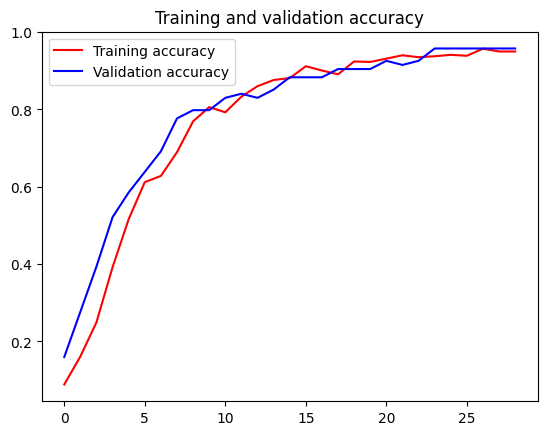

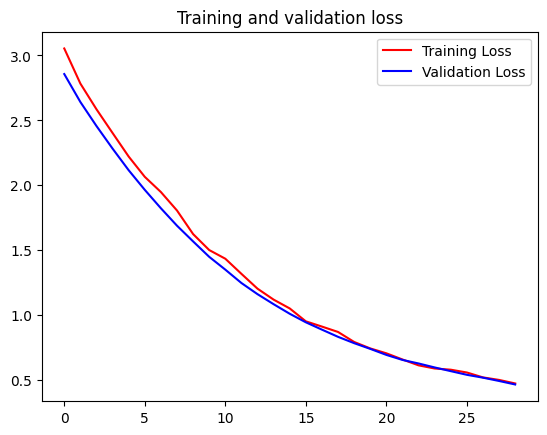

In [ ]:

# Plot the chart for accuracy and loss on both training and validation
acc = dataset['accuracy']
val_acc = dataset['val_accuracy']
loss = dataset['loss']
val_loss = dataset['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()


In [ ]:
# Save the entire model to a .h5 file
model.save('/content/drive/Shared drives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2/final_model.h5')


1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


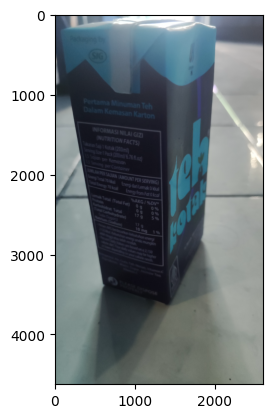

Image IMG_20241207_135017.jpg: Predicted class: Teh-Kotak-Original-200ml, Accuracy: 73.68%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step


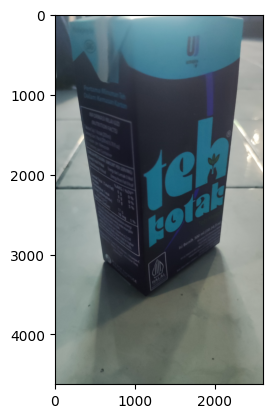

Image IMG_20241207_135004 (1).jpg: Predicted class: Teh-Kotak-Original-200ml, Accuracy: 82.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step


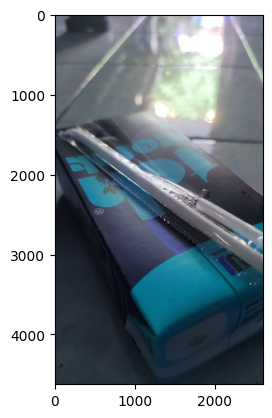

Image IMG_20241207_134914.jpg: Predicted class: Ultra-Milk-Coklat-125ml, Accuracy: 37.03%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


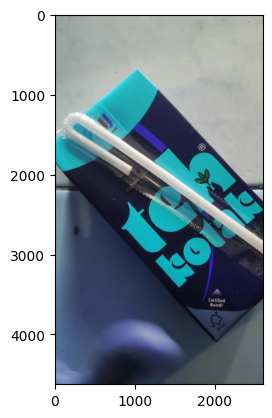

Image IMG_20241207_134840.jpg: Predicted class: Teh-Kotak-Original-200ml, Accuracy: 71.41%
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step


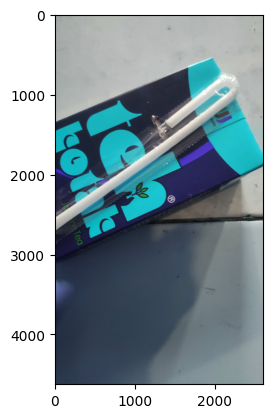

Image IMG_20241207_134850.jpg: Predicted class: Ultra-Milk-Coklat-125ml, Accuracy: 25.34%


In [ ]:

import os
import cv2
import numpy as np
import tensorflow as tf

# Load your trained model (replace 'model_path' with the actual path to your saved model)
model = tf.keras.models.load_model('/content/drive/Shareddrives/Capstone_Product/Fooddrink.dataset/model_checkpoints_2/final_model.h5')

# Path to the folder containing images for prediction
folder_path = "/content/drive/Shareddrives/Capstone_Product/Fooddrink.dataset/test_2/Teh-Kotak-Original-200ml"

# Loop through each image in the folder
for filename in os.listdir(folder_path):
    img = cv2.imread(os.path.join(folder_path, filename))
    # Resize the image to match the input size of your model
    resize = tf.image.resize(img, (224, 224))
    # Normalize pixel values to [0, 1]
    input_data = np.expand_dims(resize / 255, 0)
    # Make predictions
    predictions = model.predict(input_data)
    plt.imshow(img)
    plt.show()
    # Assuming your model outputs class probabilities, you can get the predicted class index
    class_names = list(train_generator.class_indices.keys())
    predicted_class_index = np.argmax(predictions)
    predicted_class_name = class_names[predicted_class_index]
    predicted_probability = np.max(predictions) * 100
    print(f"Image {filename}: Predicted class: {predicted_class_name}, Accuracy: {predicted_probability:.2f}%")
